<a href="https://colab.research.google.com/github/dnguyenasu/CHM343/blob/main/Dustin_Nguyen_Bomb_Cal_Simulation_BenzoicAcid_CHM343_Fall2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bomb Calorimetry Simulator - Example - CHM 343 - Spring 2025

*Jeffery L. Yarger - jyarger@proton.me*


The ASU Online CHM 343 quiz on Canvas for the Spring 2025 semester has two questions that use data from the bomb calorimeter simulator.  This data was uploaded to the CHM 343 GitHub 'Calorimetry' repo.  This colab notebook provides an example of data analysis.

This juypter notebook is written in python and designed to be web browser compatible using CoLaboratory ([Google CoLab](https://colab.research.google.com/)) and public [GitHub](https://github.com/) repositories.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CHM343/Calorimetry/blob/main/Notebooks/Bomb_Cal_Simulation_Example_CHM343_Spring2025.ipynb)


# Bomb Calorimetry Simulation

A [bomb calorimetry simulation website (v2)](https://asu-molecular-sciences-cloud-lab.github.io/bomb_calorimetry_v2/#/) has been developed to generate data that would be indistinquishable from data aquired from a [Parr instrument company 1341 Plain Jacket Bomb Calorimeter](https://www.parrinst.com/products/oxygen-bomb-calorimeters/1341-plain-jacket-bomb-calorimeter/).  The simulator has Calorimeter Codes from 0001-9999, with each code representing a slightly different Parr container with slightly different calorimeter constants.  This simulates the common variation between different Parr containers that would be found in a real experimental lab.

<img src="https://github.com/CHM343/Calorimetry/blob/main/Images/Bomb_Calorimetry_Simulator_Front_Page_v2.png?raw=true" width="550" alt="Bomb Cal Image" />


Screenshots of the bomb calorimetry simulator run:

<img src="https://github.com/CHM343/Calorimetry/blob/main/Images/2025_01_25_Benzoid_Acid_Bomb_Cal_Simulator_0001_Data_Plot.png?raw=true" width="550" alt="Bomb Cal Image" />

<img src="https://github.com/CHM343/Calorimetry/blob/main/Images/2025_01_25_Benzoid_Acid_Bomb_Cal_Simulator_0001_Data_Table.png?raw=true" width="550" alt="Bomb Cal Image" />

# Background Information

The enthalpy of combustion can be done using data from the bomb calorimetry simulation. The "device" was first calibrated by combusting benzoic acid, for which the enthalpy of combustion is well known. The calorimeter constant ($C$<sub>eq</sub>) was calculated as follows:

\begin{equation}
{C}_{eq} = \frac{{E}_{released}}{-\Delta T}\tag{Eq. 1}
\end{equation}

 where $E$<sub>released</sub> = $C$<sub>sample</sub> X (sample weight) + $C$<sub>wire</sub> X (wire weight).

The combustion enthalpies for subsequent samples were found by using the $C$<sub>eq</sub> just determined within the following equation:


\begin{equation}
{\Delta H}=({C}_{eq}{\Delta T } +{q}_{corr})/n + {R}{T}{\Delta N}_{gas}\tag{Eq. 2}
\end{equation}

in which $q$<sub>corr</sub> is the correction for the heat released by the burning of the ignition wire (as above) and $RT\Delta N$<sub>gas</sub> accounts for the change in pressure-volume resulting from the molar gas difference before and after combustion.

Normalized plots of temperature vs. time data are shown below. The temperature change ($\Delta T$) was found in each case by performing linear regressions on the first and last ten data points collected and extrapolating the lines to a common point in time, selected so that a line drawn vertically between the regression lines at that point approximately equalized the areas bounded by the temperature curves, regression lines, and vertical line just drawn (shown in visualizations). The regression lines are the initial and final temperatures; for an adiabatic device (such as the simulated calorimeter), these lines should be parallel. The vertical line is drawn because the temperature change is considered to be instantaneous along it. The difference between the final and initial tempearture lines at that point is $\Delta T$.

# Colab - Python Code for Analysis of Simulated Data

This is simulation data using the Calorimeter Code 0001 (and uploaded to the CHM343 GitHub repo.

In [51]:
# Primary Python Libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Read in Bomb Cal Simulated Data

df_ba_0001 = pd.read_table('https://raw.githubusercontent.com/dnguyenasu/CHM343/refs/heads/main/data_benzoic_acid_cc3338.csv', sep = "," , header=11, skiprows=[11])

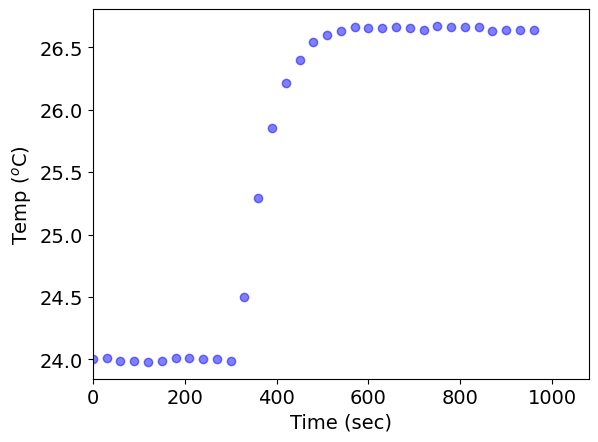

In [53]:
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_ba_0001['Time (s)'], df_ba_0001['Temperature (C)'], 'o', alpha=0.5, color = 'blue', label = 'Benzoic Acid')

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1080)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

In [54]:
#@title Determine ΔT
# Linear Extrapolation of starting and ending
Number_Points = 10
Bomb_Cal_Initial = df_ba_0001[df_ba_0001.index.start:df_ba_0001.index.start+Number_Points]
Bomb_Cal_Final = df_ba_0001[df_ba_0001.index.stop-1-Number_Points:df_ba_0001.index.stop-1]

# Linear fits for initial and final data points
mi, bi = np.polyfit(Bomb_Cal_Initial['Time (s)'], Bomb_Cal_Initial['Temperature (C)'], deg=1)
mf, bf = np.polyfit(Bomb_Cal_Final['Time (s)'], Bomb_Cal_Final['Temperature (C)'], deg=1)

# Estimate Delta T from linear extrapolations
guess_temp = 375
dt = ((bf + mf * guess_temp) - (bi + mi * guess_temp))

# Estimate Delta T from max/min (good estimate if water temp is > room temp)
dt_est = df_ba_0001['Temperature (C)'].max() - df_ba_0001['Temperature (C)'].min()

# Estimate Delta T from linear extrapolations
guess_tmin = 300
guess_tmax = 500
dt_min = ((bf + mf * guess_tmin) - (bi + mi * guess_tmin))
dt_max = ((bf + mf * guess_tmax) - (bi + mi * guess_tmax))

<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-940412593.py:29: SyntaxWarning: invalid escape sequence '\D'
  ax.text(guess_temp+50, (df_ba_0001['Temperature (C)'].min() + (df_ba_0001['Temperature (C)'].max() - df_ba_0001['Temperature (C)'].min())/2), '$\Delta$T = {} $^o$C'.format(round(dt, 2)), fontsize=12)


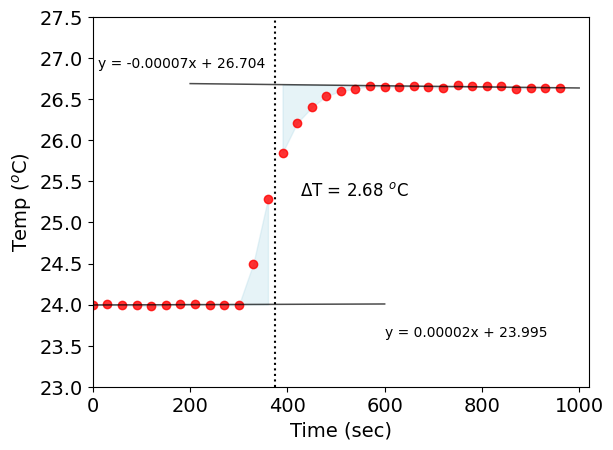

In [55]:
#@title Plot Data and ΔT Determination
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '14'

# Plot data
ax.plot(df_ba_0001['Time (s)'], df_ba_0001['Temperature (C)'], 'o', alpha=0.8, color = 'red', label = 'Benzoic Acid')

# Create linear sequences for fit lines
xseq_initial = np.linspace(0, 600, num=10)
xseq_final = np.linspace(200, 1000, num=10)

# Plot extrapolation lines
ax.plot(xseq_initial, bi + mi * xseq_initial, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq_final, bf + mf * xseq_final, alpha=0.7, color="k", lw=1.1)

# Draw a vertical line for temperature change
ax.axvline(x=guess_temp, color='k', linestyle='dotted')

# Fill between data and linear extrapolations
ax.fill_between(df_ba_0001['Time (s)'],bi + mi * df_ba_0001['Time (s)'], df_ba_0001['Temperature (C)'],where=df_ba_0001['Time (s)']<=guess_temp , interpolate=True, color='lightblue', alpha=0.3)

ax.fill_between(df_ba_0001['Time (s)'],bf + mf * df_ba_0001['Time (s)'], df_ba_0001['Temperature (C)'],where=df_ba_0001['Time (s)']>=guess_temp , interpolate=True, color='lightblue', alpha=0.3)


# Annotate ΔT
ax.text(guess_temp+50, (df_ba_0001['Temperature (C)'].min() + (df_ba_0001['Temperature (C)'].max() - df_ba_0001['Temperature (C)'].min())/2), '$\Delta$T = {} $^o$C'.format(round(dt, 2)), fontsize=12)

# Annotate regression lines with equations
ax.annotate(f'y = {mi:.5f}x + {bi:.3f}', xy=(xseq_initial[-1], bi + mi * xseq_initial[-1]), xytext=(600, bi + mi * xseq_initial[-1] - 0.4),fontsize=10)

ax.annotate(f'y = {mf:.5f}x + {bf:.3f}', xy=(xseq_final[0], bf + mf * xseq_final[0]), xytext=(10, bf + mf * xseq_final[0] + 0.2),fontsize=10)

# Plot x and y axis min/max limits and x and y axis labels for the plot
plt.xlim(0, 1020)
plt.ylim(23, 27.5)
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Temp ($^o$C)", fontsize=14)

# Display the Plot
plt.show()

The calorimeter constant ($C$<sub>eq</sub>) was calculated as follows:

\begin{equation}
{C}_{eq} = \frac{{E}_{released}}{-\Delta T} =
\end{equation}

 where $E$<sub>released</sub> = $C$<sub>sample</sub> X (sample weight) + $C$<sub>wire</sub> X (wire weight).

 The calorimeter constant table lists the value at 10042.50 J/K (for #0001).  The instructions are confusing with respect to if the Ceq is positive or negative.


In [56]:
#@title Calculate Calorimeter Constant
Hba = 26425
Hfe = 5858
Wba = 2.0
Wfe = 0.021-0.017
Erel = (Hba*Wba)+(Hfe*Wfe)
Ceq = Erel/dt

print('Ceq =', round(Ceq,2))

Ceq = 19757.26


In [57]:
#@title Horizontal Line Thermodynamic Estimate (Over-Estimate)
#Ceq = Erel/dt_est
#print('Ceq =', round(Ceq,2))

In [58]:
#@title Thermodynamic Estimate - Minimum and Maximum
Ceq_min = Erel/dt_min
Ceq_max = Erel/dt_max

print('Ceq,min =', round(Ceq_min,2), " ", 'Ceq,max =', round(Ceq_max,2))

Ceq,min = 19709.28   Ceq,max = 19837.76


## Error Analysis

Estimate the +/- randon statistical error based on error in simulated data and propagating this error to determination of Delta-T and subsequent Ceq.